<a href="https://colab.research.google.com/github/gjones1228/projects/blob/main/Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas
import matplotlib.pyplot as plt
import json
import sqlite3


df = pandas.read_csv('https://raw.githubusercontent.com/gjones1228/projects/main/Orders.csv', index_col='CustID')
#df.to_json('test.json')
#print(df)
#df.head()
#Let's normalize the data
#Codd Slogan for Normalization:
  #The key, the whole key, and nothing but the key, so help me Codd.
  #“The key” : Tables may not contain repeating groups, which prevent a table from having a primary key. (1NF)
  #“the whole key”: Every attribute must be functionally dependent on the entire primary key. (2NF)
  #“and nothing but the key,” : There may not be any transitive dependencies, which involve a non-key field.(3NF)
  #“ so help me, Codd.” : The theorist who gave us these rules.

# Pull out the customer data = Customers (CustID -> CustName, Address, Phone)
customers = df[["CustName","Address","Phone"]]
#print(customers)

#create customer database
customers_sql = sqlite3.connect('Customers.db')
c = customers_sql.cursor()
#c.execute('DROP TABLE CUSTOMERS')
c.execute('CREATE TABLE CUSTOMERS (CustName,Address,Phone)')
customers_sql.commit()
customers.to_sql('CUSTOMERS', customers_sql, if_exists='replace', index = False)

##Display the customers data in table 
c.execute('''  
SELECT * FROM CUSTOMERS
          ''')
for row in c.fetchall():
    print (row)

#pull out the items = Item (ItemNo, Title, Price)
items = df[["ItemNo","Title","Price"]]
print(items)

#create items database
items_sql = sqlite3.connect('ITEMS.db')
c = items_sql.cursor()
#c.execute('DROP TABLE ITEMS')
c.execute('CREATE TABLE ITEMS (ItemNo, Title, Price)')
items_sql.commit()
items.to_sql('ITEMS', items_sql, if_exists='replace', index = False)

##Display the items data in table 
c.execute('''  
SELECT * FROM ITEMS
          ''')
for row in c.fetchall():
    print (row)


#Pull out the orders = Orders (OrderNo, OrderDate)
orders = df[["OrderNo","OrderDate"]]
print(orders)

#Pull out the line items = Line Items (OrderNo, ItemNo, Shipped)
line_items = df[["OrderNo","ItemNo","Shipped"]]
print (line_items)

#Show only custID's with prices greater than 50
#order_price = df["Price"].astype(int)
#order_price.head()
above_50 = df["Price"].astype(int) > 50
above_50.head()

('Micky Mouse', '123 Disney Street', '123-456-7890')
('Donald Duck', '124 Disney Street', '231-654-0963')
('Daffy Duck', '125 Disney Street', '154-456-8956')
('Minnie Mouse', '123 Disney Street', '123-456-7891')
('Micky Mouse', '123 Disney Street', '123-456-7890')
('Donald Duck', '124 Disney Street', '231-654-0963')
('Daffy Duck', '125 Disney Street', '154-456-8956')
('Minnie Mouse', '123 Disney Street', '123-456-7891')
('Micky Mouse', '123 Disney Street', '123-456-7890')
('Donald Duck', '124 Disney Street', '231-654-0963')
('Daffy Duck', '125 Disney Street', '154-456-8956')
('Minnie Mouse', '123 Disney Street', '123-456-7891')
        ItemNo               Title   Price
CustID                                    
100       5623         Weber Grill  199.00
101       6231       gibson guitar  899.00
102       1234     wilson football   16.00
103       2598    Kitchenaid mixer  249.99
104       1623   fiesta  tableware   12.99
105       2231          magic wand   29.99
106       3234      

CustID
100     True
101     True
102    False
103     True
104    False
Name: Price, dtype: bool

Each column in a DataFrame object is a series. The inner square brackets define a Python list with column names, whereas the outer brackets are used to select the data from a pandas DataFrame.

We can graph any of this data

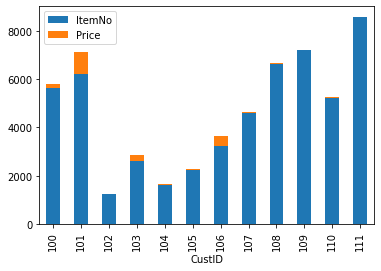

In [87]:
#order_price.plot.bar (stacked=True)
items.plot.bar (stacked=True)

Put the data in JSON format

In [88]:

#convert the customer data to json, print and save to a file
customers_json = customers.to_json(orient="index")
parsed_customers = json.loads(customers_json)
print(json.dumps(parsed_customers, indent=4))
#with open("C:\Dev\data\customers.json", "w") as outfile: 
#    outfile.write(json.dumps(parsed_customers, indent = 4)) 

#convert the items data to json
items_json = items.to_json(orient="index")
parsed_items = json.loads(items_json)
print(json.dumps(parsed_items, indent=4))

#convert the orders data to json
orders_json = orders.to_json(orient="index")
parsed_orders = json.loads(orders_json)
print(json.dumps(parsed_orders, indent=4))

#convert the line items data to json
lineitems_json = line_items.to_json(orient="index")
parsed_lineitems = json.loads(lineitems_json)
print(json.dumps(parsed_lineitems, indent=4))


{
    "100": {
        "CustName": "Micky Mouse",
        "Address": "123 Disney Street",
        "Phone": "123-456-7890"
    },
    "101": {
        "CustName": "Donald Duck",
        "Address": "124 Disney Street",
        "Phone": "231-654-0963"
    },
    "102": {
        "CustName": "Daffy Duck",
        "Address": "125 Disney Street",
        "Phone": "154-456-8956"
    },
    "103": {
        "CustName": "Minnie Mouse",
        "Address": "123 Disney Street",
        "Phone": "123-456-7891"
    },
    "104": {
        "CustName": "Micky Mouse",
        "Address": "123 Disney Street",
        "Phone": "123-456-7890"
    },
    "105": {
        "CustName": "Donald Duck",
        "Address": "124 Disney Street",
        "Phone": "231-654-0963"
    },
    "106": {
        "CustName": "Daffy Duck",
        "Address": "125 Disney Street",
        "Phone": "154-456-8956"
    },
    "107": {
        "CustName": "Minnie Mouse",
        "Address": "123 Disney Street",
        "Phone": "123